# PH413 Computation Physics - Practice [Week 5]

## 1. Numerical Methods (1) : Errors, Accuracy, Stability

## 1.1 Rounding error

* Rounding error is a error comes from finite precision, due to limitation of machine memory.
    * It is a hardware error, thus there will be no rounding error if we have infinite percision.
* This error can be accumulated into somewhat substantial amount.

* Let us consider a value $\phi= \frac{1}{2} \left( \sqrt{5}-1\ \right)$ satisfying $\phi^n = \phi^{n-1} + \phi^{n-2} $.

In [1]:
import math as m

phi_z1 = 0.61803398749895
phi_z2 = 0.5*(m.sqrt(5.0)-1)

print('True phi = {}'.format(phi_z1))
print('Calculated phi = {}'.format(phi_z2))
print('Difference = {}'.format(abs(phi_z1-phi_z2)))

True phi = 0.61803398749895
Calculated phi = 0.6180339887498949
Difference = 1.2509449032194198e-09


In [2]:
phi = []
phi2 = []
phi3 = []
phi.append(1)
phi.append(phi_z1)
print('True phi = {}'.format(phi_z1))
print(' n   \t        phi^(n-2)-phi^(n-1) \t    phi^n \t |rel. error|')
a = []
for i in range(1,30):
    phi.append(phi[i-1]-phi[i])
    real_phi = m.pow(phi_z1, i+1)
    rel_error = (phi[i+1]-real_phi)/real_phi
    a.append(phi[i+1]-real_phi)
    
    print(' n = {0}    \t   {1:0.10f}  \t {2:0.10f} \t {3:0.4f}'.format(i+1, phi[i+1], m.pow(phi_z1, i+1), abs(rel_error)))

True phi = 0.61803398749895
 n   	        phi^(n-2)-phi^(n-1) 	    phi^n 	 |rel. error|
 n = 2    	   0.3819660125  	 0.3819660097 	 0.0000
 n = 3    	   0.2360679750  	 0.2360679761 	 0.0000
 n = 4    	   0.1458980375  	 0.1458980326 	 0.0000
 n = 5    	   0.0901699375  	 0.0901699428 	 0.0000
 n = 6    	   0.0557281000  	 0.0557280893 	 0.0000
 n = 7    	   0.0344418375  	 0.0344418533 	 0.0000
 n = 8    	   0.0212862625  	 0.0212862359 	 0.0000
 n = 9    	   0.0131555750  	 0.0131556173 	 0.0000
 n = 10    	   0.0081306876  	 0.0081306186 	 0.0000
 n = 11    	   0.0050248874  	 0.0050249986 	 0.0000
 n = 12    	   0.0031058002  	 0.0031056199 	 0.0001
 n = 13    	   0.0019190873  	 0.0019193787 	 0.0002
 n = 14    	   0.0011867129  	 0.0011862413 	 0.0004
 n = 15    	   0.0007323744  	 0.0007331374 	 0.0010
 n = 16    	   0.0004543385  	 0.0004531038 	 0.0027
 n = 17    	   0.0002780358  	 0.0002800336 	 0.0071
 n = 18    	   0.0001763027  	 0.0001730703 	 0.0187
 n = 19    	   0.00

## 1.2 Truncation error

* If we apporximate an infinite sum into sum of finite series, there should be an error corresponds to ignored terms. It is called truncation error.
    * Truncation error presents even with infinite precision, because software (algorithm) inself inherently possess truncation error.
    * We will study more about these infinite sums (such as numerical integration methods) in Numerical methods (2).

In [3]:
def exp2x(x):
    return m.exp(2*x)

def integrated_exp2x_analytic(x):
    return (m.exp(2*x)-1)/2.0

* Try the following (naive) numerical integration with different dt value. 
* You will observe the trade-off between time and abs. error. 

In [4]:
%%time
result = 0
dt = 0.01
N = 1/dt
for i in range(int(N)):
    result += dt*exp2x(i*dt)
    
print('numerical : {}, analytical : {}, abs. error : {}'.format(result, integrated_exp2x_analytic(1.0), abs(result-integrated_exp2x_analytic(1.0))))

numerical : 3.162689252529098, analytical : 3.194528049465325, abs. error : 0.031838796936227265
CPU times: user 327 µs, sys: 0 ns, total: 327 µs
Wall time: 281 µs


**★★ Task 1★★**

* Find your machine-epsilon $\epsilon_m$.


* Write down your method. (if possible, your code. If it's too long, you can capture the screenshot of the code and explain it.)

In [10]:
eps = 1

while(1):
    if 1 + eps == 1:
        break
    eps = eps/2

print(eps)

1.1102230246251565e-16


## 1.2. Numerical Differentiation

* Mainly, your goal is implement a required function nicely.
* But, watch out the stiff equations. It has no fixed definition, since it depends on your numerical method.

**======================== ★ Task 2 ★ ========================**
* Generate a noisy sequence $y(t) = (1-e^{-2t})+U[-0,05, 0.05]$ for t= 0, 0.1, 0.2, ... 10.



* Numerically differentiate the sequence in following ways, and compare thosewith analytical result.
    * Forward difference
    * Central difference
    
**==========================================================**

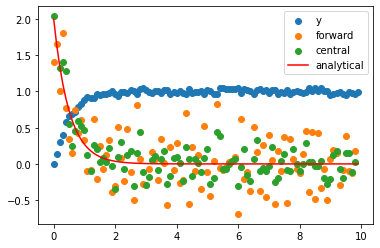

In [47]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 10, .1)

y = (1 - np.exp(-2 * t)) + np.random.rand(100) * .1 -.05

diff_forward = np.empty_like(y)
for i in range(99):
    diff_forward[i] = (y[i+1] - y[i]) / .1
diff_forward[-1] = np.nan

diff_central = np.empty_like(y)
for i in range(2,99):
    diff_central[i] = (y[i+1] - y[i-1]) / .2
diff_central[-1] = np.nan
diff_central[1] = np.nan

diff_analytical = 2 * np.exp(-2 * t)
    
plt.scatter(t,y, label='y')
plt.scatter(t, diff_forward, label='forward')
plt.scatter(t, diff_central, label='central')
plt.plot(t, diff_analytical, c='r', label='analytical')
plt.legend()

# the central is closer to the analytical solution wenn y flattens out 
# this is also expected because there is 2h in the denominator now

## 1.3. Numerical Integration

**==================== ★★ Assignment1 ★★ ====================**

* Generate a sequence $y(x) = {1\over{1+x^2}}$ for x = 0 ~ 1, with $dt = 0.01$



* Compare accumulated errors for following methods
    * Rectangular methods
    * Trapezoidal rules
    * RK4
    * Analytic integration
    
    
* From above results, verify the order of each method.
    * For other words, plot the accumulated errors by changing step size, and determine the power exponent.
    
**============================================================**   

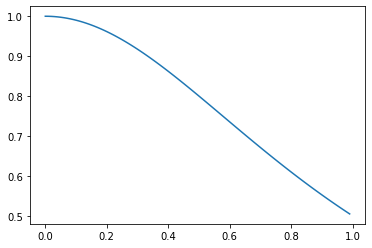

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# taken from a direct calculation
exact = np.pi / 4


def y(x):
    return 1 / (1 + x**2)
y = np.vectorize(y)

# rectengular method using a midpoint
def rect(dt):
    x = np.arange(0,1,dt)
    x = x + .5 * dt
    integral = np.sum(y(x))
    integral = integral * dt
    return integral

def trap(dt):
    x = np.arange(0 + dt, 1, dt)
    integral = y(0) + y(1)
    integral = integral + 2 * np.sum(y(x))
    integral = integral * dt/2
    return integral

def rect_err(dt):
    return np.abs(rect(dt) - exact)

def trap_err(dt):
    return np.abs(trap(dt) - exact)

rect = np.vectorize(rect)
trap = np.vectorize(trap)
rect_err = np.vectorize(rect_err)
trap_err = np.vectorize(trap_err)



x = np.arange(0,1, .01)
plt.plot(x,y(x))

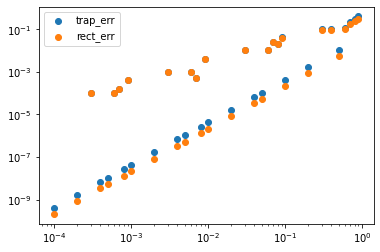

In [113]:
dt = np.arange(.1, 1, .1)
dt = 1 * dt
dt = np.append(.1 * dt, dt)
dt = np.append(.01 * dt, dt)


plt.scatter(dt, trap_err(dt), label='trap_err')
plt.scatter(dt, rect_err(dt), label='rect_err')

plt.legend()
plt.yscale('log')
plt.xscale('log')

In [111]:
dt

array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03,
       8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01])

## END OF WEEK 5! Have a good day :)